## `Section 04: Creating Plots on Data Aware Grids`


### 01-Building a FacetGrid
* Create a `FacetGrid` that shows a point plot of the Average SAT scores `SAT_AVG_ALL`.
* Use `row_order` to control the display order of the degree types.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

with open("datasets/College_Scorecard_Tuition.csv", "rb") as file:
    df = pd.read_csv(file, index_col=0)

df.head(3)

,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,14600,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,14250,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,11082,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City


C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


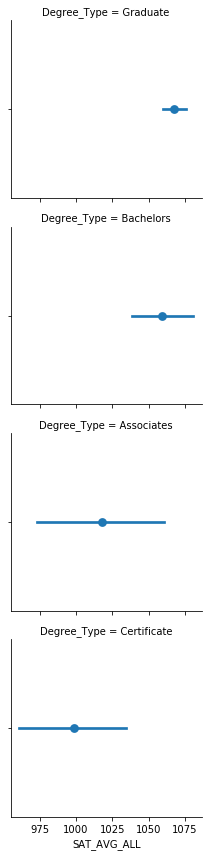

<Figure size 432x288 with 0 Axes>

In [6]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

### 02-Using a factorplot
* Create a `factorplot()` that contains a boxplot (`box`) of `Tuition` values varying by `Degree_Type` across rows.

C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


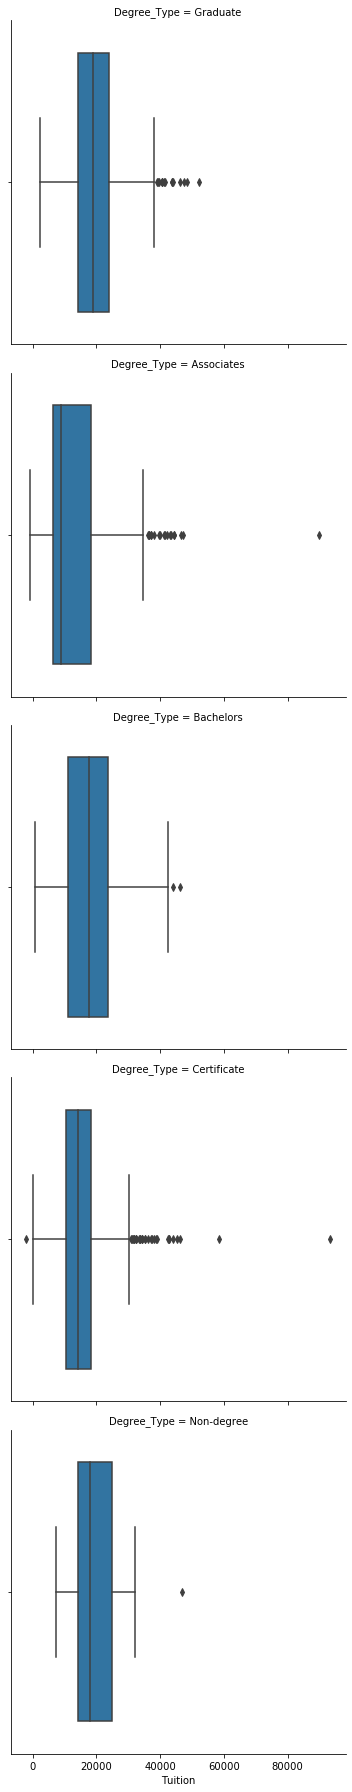

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

* Create a `factorplot()` of SAT Averages (`SAT_AVG_ALL`) facetted across `Degree_Type` that shows a pointplot (`point`).
Use `row_order` to order the degrees from highest to lowest level.

C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


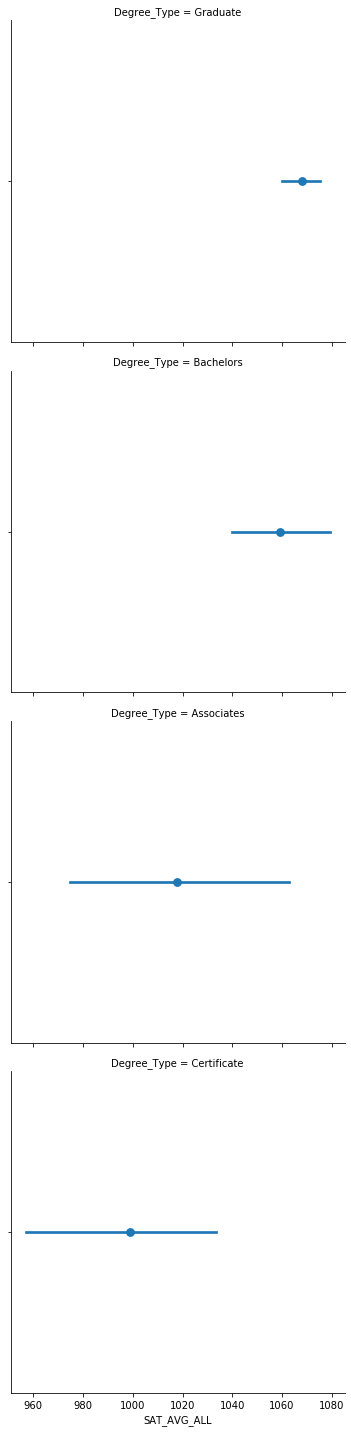

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

### 03-Using a lmplot
* Create a `FacetGrid()` with `Degree_Type` columns and scatter plot of `UG` and `PCTPELL`.



In [11]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']

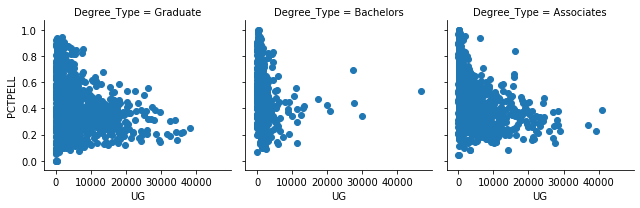

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

* Create a `lmplot()` using the same values from the `FacetGrid()`.

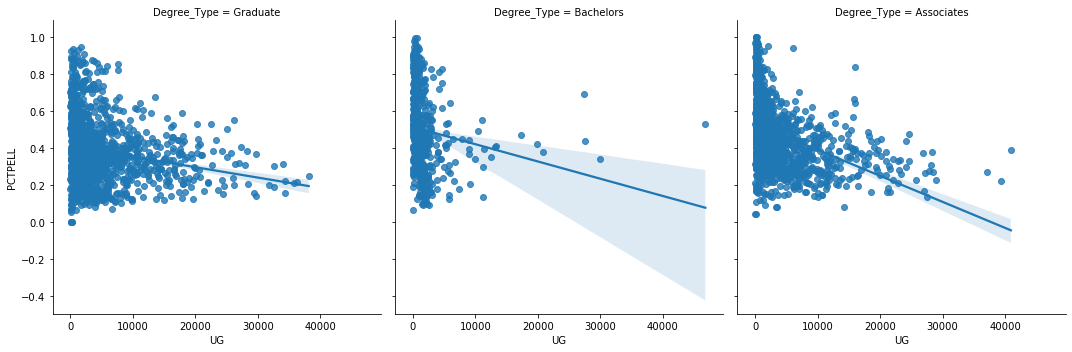

<Figure size 432x288 with 0 Axes>

In [14]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

* Create a facetted `lmplot()` comparing `SAT_AVG_ALL` to `Tuition` with columns varying by `Ownership` and rows by `Degree_Type`.
* In the `lmplot()` add a `hue` for Women Only Universities.

In [16]:
inst_ord = ['Public', 'Private non-profit']

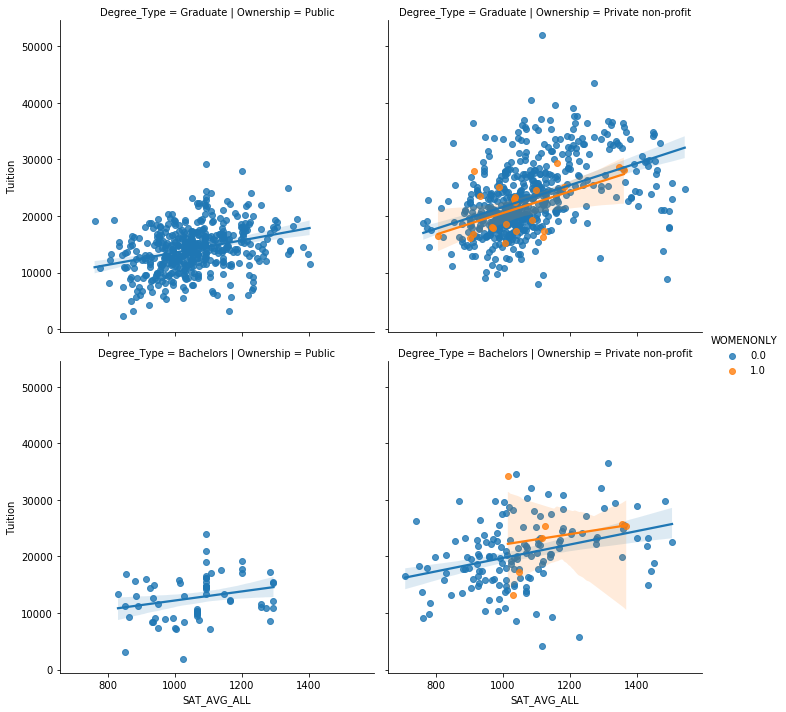

<Figure size 432x288 with 0 Axes>

In [17]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

### 04- Building a PairGrid
* Compare `"fatal_collisions"` to `"premiums"` by using a scatter plot mapped to a `PairGrid()`.



In [20]:
with open("datasets/insurance_premiums.csv", "rb") as f1:
    df = pd.read_csv(f1)
df.head(3)

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West


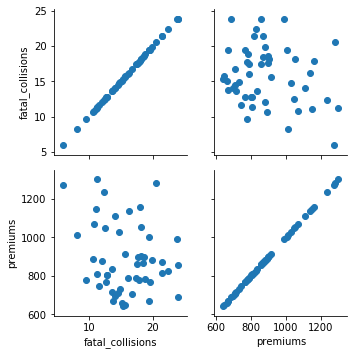

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

* Create another `PairGrid` but plot a histogram on the diagonal and scatter plot on the off diagonal.


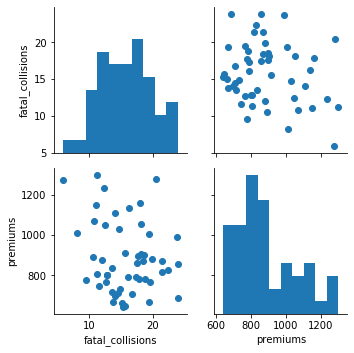

<Figure size 432x288 with 0 Axes>

In [22]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

### 05-Using a pairplot
* Recreate the pairwise plot from the previous exercise using `pairplot()`.



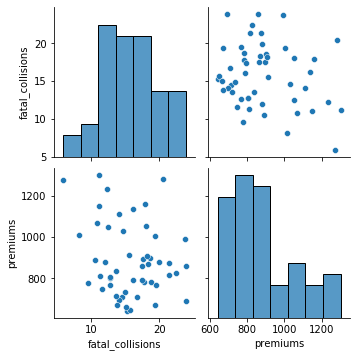

<Figure size 432x288 with 0 Axes>

In [23]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

* Create another pairplot using the "`Region`" to color code the results.
* Use the `RdBu` palette to change the colors of the plot.

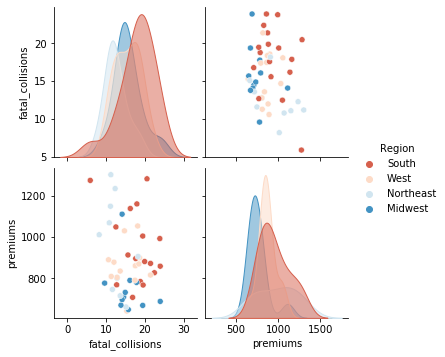

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

### 06-Additional pairplots

* This exercise will go through a couple of more examples of how the `pairplot()` can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

* One area of customization that is useful is to explicitly define the `x_vars` and `y_vars` that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

* We have already looked at using `kind` to control the types of plots. We can also use `diag_kind` to control the types of plots shown on the diagonals. In the final example, we will include a regression and kde plot in the `pairplot`.

* Create a pair plot that examines `fatal_collisions_speeding` and `fatal_collisions_alc` on the x axis and `premiums` and `insurance_losses` on the y axis.
* Use the `husl` palette and color code the scatter plot by `Region`.

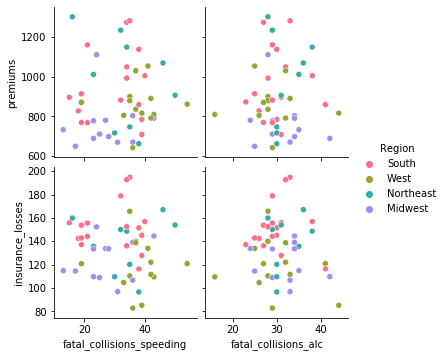

<Figure size 432x288 with 0 Axes>

In [25]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

* Build a `pairplot()` with `kde` plots along the diagonals. Include the `insurance_losses` and `premiums` as the variables.
* Use a `reg` plot for the the non-diagonal plots.
* Use the `BrBG` palette for the final plot.

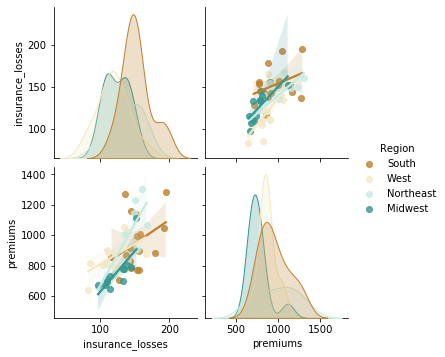

<Figure size 432x288 with 0 Axes>

In [26]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

### 07-Building a JointGrid and jointplot
* Use Seaborn's `"whitegrid"` style for these plots.
* Create a `JointGrid()` with `"hum"` on the x-axis and `"total_rentals"` on the y.
* Plot a `regplot()` and `distplot()` on the margins.

In [29]:
with open("datasets/Washington_DC_Bike_Share.csv", "rb") as file:
    df = pd.read_csv(file)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` v

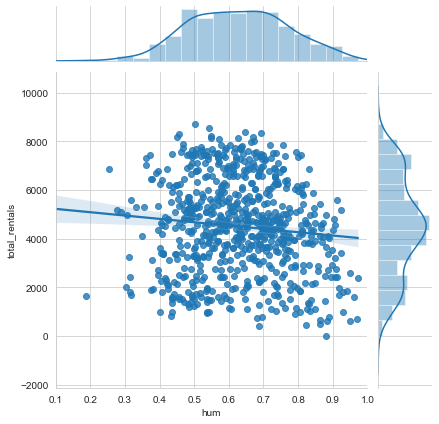

<Figure size 432x288 with 0 Axes>

In [30]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

* Re-create the plot using a `jointplot()`.


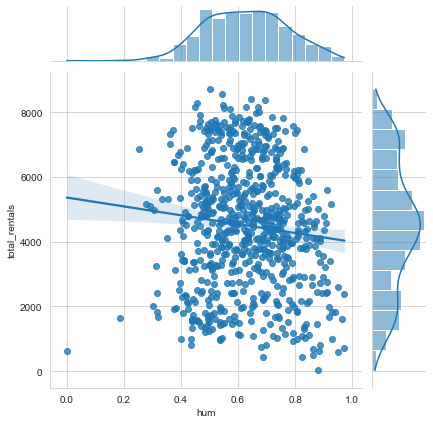

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()   

### 08-Jointplots and regression
* Create a `jointplot` with a 2nd order polynomial regression plot comparing `temp` and `total_rentals`.

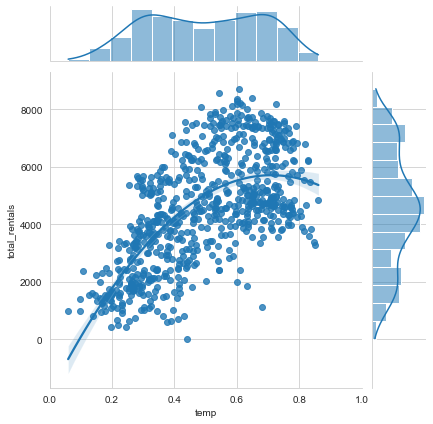

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

* Use a residual plot to check the appropriateness of the model.



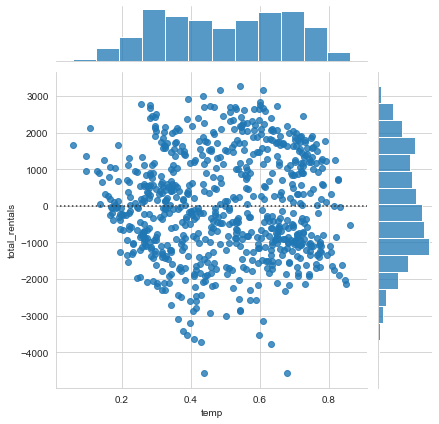

<Figure size 432x288 with 0 Axes>

In [33]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()
plt.clf()

### 09-Complex jointplots
* Create a `jointplot` with a scatter plot comparing `temp` and `casual` riders.
* Overlay a `kdeplot` on top of the scatter plot.

C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


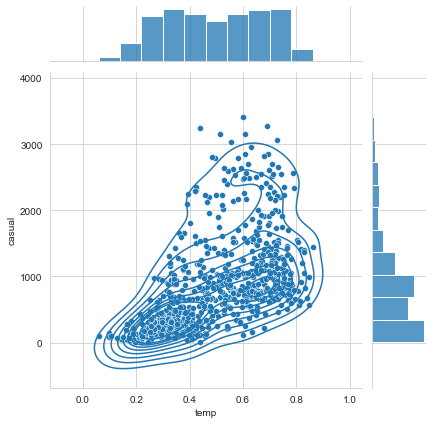

<Figure size 432x288 with 0 Axes>

In [34]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

* Build a similar plot for `registered` users.



C:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


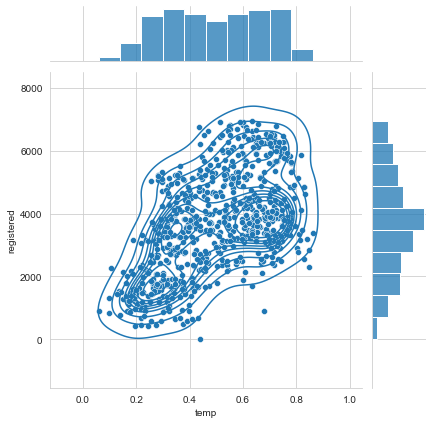

<Figure size 432x288 with 0 Axes>

In [35]:
# Replicate the previous plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

==================================
### `The End`  
==================================